# Survival analysis of Titanic training dataset - EDA

## Summary of  findings
There are three types of peoples in the world. One who does not believe in any form of flattery and the other, who considers flattery to be the biggest excitement in the world.

Admin stuff - add titles, axes and legends for all plots.

## Setup code

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt
import seaborn

# Set the global default size of matplotlib figures
#plt.rc('figure', figsize=(10, 5))

# Set seaborn aesthetic parameters to defaults
seaborn.set()

/Users/Vivek/anaconda/envs/titanic_kaggle/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Data exploration and cleanup

### Making sense of the data

In [2]:
# reading the dataset
train = pd.read_csv("train.csv")

#### Basic idea about the dataset

In [3]:
print "the variable train is of data type ", type (train)
print
print "this dataset has the following dimensions", train.shape
print
pd.DataFrame(train.columns)

the variable train is of data type  <class 'pandas.core.frame.DataFrame'>

this dataset has the following dimensions (891, 12)



,0
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


In [4]:
# renaming "Parch" field to "ParentsOrChildren"
train.rename(columns = {train.columns[7]:'ParentsOrChildren'},inplace=True)
train.rename(columns = {train.columns[6]:'SiblingsOrSpouse'},inplace=True)
print train.columns.tolist()
print
# explicitly ask to display all 12 columns. this is useful for datasets that have more columns than the page width. 
pd.set_option('display.max_columns', 12)
train.head(5)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SiblingsOrSpouse', 'ParentsOrChildren', 'Ticket', 'Fare', 'Cabin', 'Embarked']



,PassengerId,Survived,Pclass,Name,Sex,Age,SiblingsOrSpouse,ParentsOrChildren,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# get some understanding of the numeric variables
train.describe()

/Users/Vivek/anaconda/envs/titanic_kaggle/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SiblingsOrSpouse,ParentsOrChildren,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observations** - 
1. Age has only 714 values. Also pretty young crowd in the Titanic with 75% of people less than 38.
2. Only 38.38% survival
3. More than 50% people were in the 3rd class
4. Most people don't have any parents or children - 75% have 0
5. Some people freeloaded into the Titanic i.e. 0 fare, while 75% have paid \$31 or less. So the max number \$512 is clearly an outlier or a mistake.
6. Obviously, passengerid, survived and Pclass are not numbers. need to fix this in a data munging step. 

### Data cleanup and quick checks
Age has 177 missing values. Factors such as Passengerid, survived, Pclass are being considered as numbers. Gotta clean all this up!

In [6]:
# converting numerical to categorical

train['PassengerId'] = train['PassengerId'].astype('category')
train['Survived'] = train['Survived'].astype('category')
train['Pclass'] = train['Pclass'].astype('category')

# fill th4e missing values with median age values
print "median age is", train['Age'].median()

train['Age_filled'] = train['Age'].fillna(train['Age'].median())

# check again 
train.describe()

median age is 28.0


,Age,SiblingsOrSpouse,ParentsOrChildren,Fare,Age_filled
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,29.361582
std,14.526497,1.102743,0.806057,49.693429,13.019697
min,0.420000,0.000000,0.000000,0.000000,0.420000
25%,NaN,0.000000,0.000000,7.910400,22.000000
50%,NaN,0.000000,0.000000,14.454200,28.000000
75%,NaN,1.000000,0.000000,31.000000,35.000000
max,80.000000,8.000000,6.000000,512.329200,80.000000


#### Quick comps on non-numerical variables

In [7]:
# get a sense of the categorical variables

print "Survived", train.Survived.unique()
print
print "Pclass", train.Pclass.unique()
print
print "unique passengerids", len(train.PassengerId.unique())
print
print "unique names", len(train.Name.unique())
print
print "Sex", train.Sex.unique()
print
print "Embarked", train.Embarked.unique()
#train['Sex'].unique()

Survived [0, 1]
Categories (2, int64): [0, 1]

Pclass [3, 1, 2]
Categories (3, int64): [3, 1, 2]

unique passengerids 891

unique names 891

Sex ['male' 'female']

Embarked ['S' 'C' 'Q' nan]


**OBSERVATION** - Sex is male and female. let's convert this into factors for future modelling. Same for Embarked.Further, remove the nan from embarked.
**Important** - I realised while doing some EDA that I had made Survived into categorical variable. Rather, it should be factorised. Changing this now.

In [8]:
# factorising sex
train['factored_Sex'] = pd.factorize(train['Sex'])[0]
print "factored_Sex", train.factored_Sex.unique()
print

# analysing embarked values
print train.Embarked.value_counts(dropna = False)
print

# filling the nan's with "S" because it seems like 72% of folks have boarded at Southampton.
train['Embarked'] = train.Embarked.fillna("S")
train['factored_Embarked'] = pd.factorize(train['Embarked'])[0]
print train.factored_Embarked.value_counts(dropna = False)

# factorising sex
train['Survived'] = pd.factorize(train['Survived'])[0]
print "factorised_Survived", train.Survived.unique()
print

factored_Sex [0 1]

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

0    646
1    168
2     77
Name: factored_Embarked, dtype: int64
factorised_Survived [0 1]



### Exploratory analysis to get some intuition
Some intuition around the topic of Titanic (mostly through the movie and some reading)

Hypotheses to be tested
- Women and children first!
- First class passengers survived more than third class
- Number of siblings and parents contributed 
    - Adults with spouses or siblings survived more by virtue of helping each other
    - Children with parents survived more than those without parents
    - Converse to point 2, parents with children would have sacrificed and probably had lower survival rates (just a bit)
- Where people embarked contributed to survival

In [9]:
# redrawing different columns in the titanic dataset
pd.set_option('display.max_columns', 14)
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SiblingsOrSpouse,...,Ticket,Fare,Cabin,Embarked,Age_filled,factored_Sex,factored_Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,...,A/5 21171,7.2500,NaN,S,22.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,...,PC 17599,71.2833,C85,C,38.0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,...,STON/O2. 3101282,7.9250,NaN,S,26.0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,...,113803,53.1000,C123,S,35.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,...,373450,8.0500,NaN,S,35.0,0,0


**1. How many people survived**

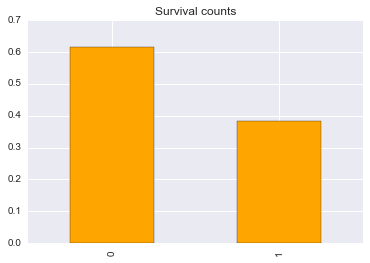

In [10]:
# normalising to get percentages
train.Survived.value_counts(normalize=True).plot(kind='bar',
                                  title="Survival counts",
                                  color='orange',
                                  align='center')

**TO DO** - get the y-ticks working in order to display %s accurately. Also, rename x-axis to Survived and Didn't survive. 

**2. How many people in different classes? and how did their survival chances differ?**

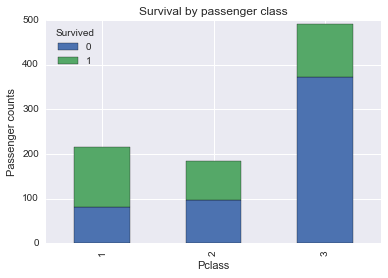

In [11]:
survived_pclass = train.groupby('Pclass')['Survived'].value_counts().unstack()
fig = survived_pclass.plot(kind = 'bar',
                     stacked=True,
                    title = 'Survival by passenger class'
#                    color=('maroon','green')
                    )
fig.set_ylabel("Passenger counts")

**Observations** - Third class has a ridiculously large number of people, but very poor survival rate. First and second class passengers were roughly 25% each, but while 2nd class passengers have 50% survival rate, first class passengers have ~70% survival chance.

**TO DO** - convert to percentage and show % labels for each group split.

**3. Similar plots for Sex and embarked **

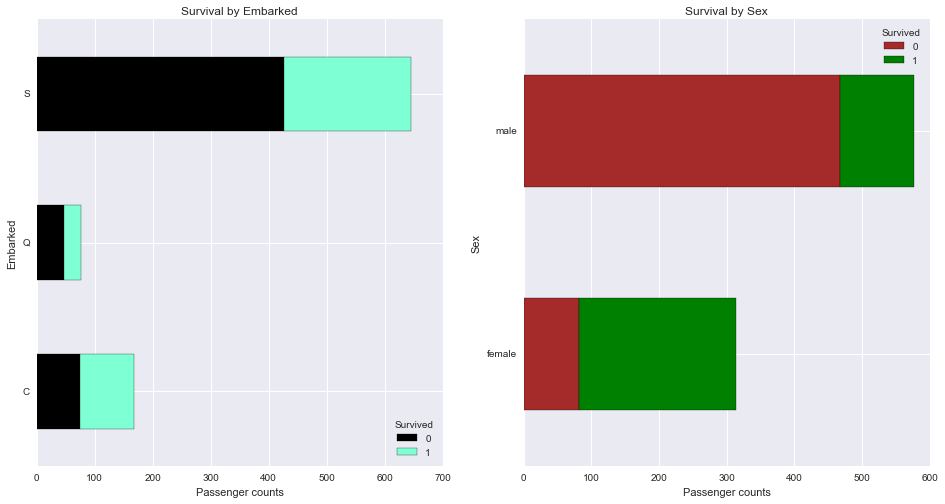

In [12]:
# smaller plots
fig, axs = plt.subplots(1,2,figsize=(16,8)) 

# plot embarked
fig1 = train.groupby('Embarked')['Survived'].value_counts().unstack().plot(kind = 'barh',
                                                                        stacked=True,
                                                                        title = 'Survival by Embarked',
                                                                        color = ('k','aquamarine'),
                                                                        ax = axs[0]
                                                                        )
fig1.set_xlabel("Passenger counts")

# plot sex
fig2 = train.groupby('Sex')['Survived'].value_counts().unstack().plot(kind = 'barh',
                                                                        stacked=True,
                                                                        title = 'Survival by Sex',
                                                                        color = ('brown','green'),
                                                                        ax = axs[1]
                                                                        )
fig2.set_xlabel("Passenger counts")

*Embarked* - most people embarked on their voyage from Southampton
           - Cherbrook has more survived than others
           - Very few people boarded Queenstown
*Sex*      - gender clearly contributed with women having a much higher survival chance than men.

**TO DO** - label percentages and also test age  to settle the women and children first hypothesis.

**ALSO DO** - I just read wiki that the third class passengers were boarded first in Southampton. So they'd be on the lower decks, while the first and second class passengers would be at the top. This could explain why third class had lower survival than first and second. Perhaps its good to see how class and deck are correlated, and then create a separate feature mixing the two.

**3.5 Another method to combine each of these features (Sex, Class and Embarked) to get a visual rep of survival - use crosstab**

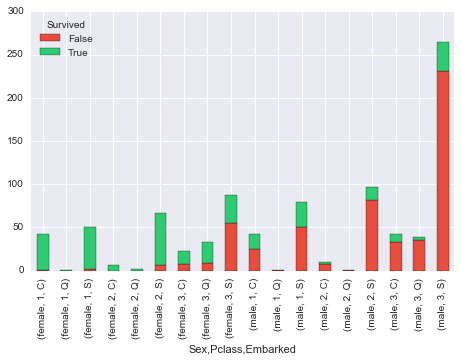

In [13]:
fig = plt.figure(figsize=(16, 8)) 
#survival = pd.crosstab([train.Sex, train.Pclass, train.Embarked], train.Survived.astype(bool))
survival = pd.crosstab([train.Sex, train.Pclass, train.Embarked], train.Survived.astype(bool))
survival.plot(kind='bar', color = ("#e74c3c", "#2ecc71"), stacked=True, grid=True)
# these colours belong to the seaborn template for a mild green and red.

# the parameter figsize was not changing the size of the plot. i realised that was because the crosstab function had made this
# into a subplot. the code below changes the dimensions of the subplot w.r.t. how much of the figsize it uses.
# Now, all of these are percents of the image height/width. The margins are sort of like CSS-style margins, only relative to 
# the bottom left corner. In other words, right=.99 means that the right margin is 1% away from the right edge.
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

This figure clearly shows that being a woman increases chances of survival far more than class or point of embarkation. First class passengers also have a big edge in survival, but mainly for the women. 

**4. We saw previously that median age is 28. Check what is the age distribution of the passengers**

(array([ 40.,  14.,  15.,  31.,  79.,  98.,  85.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([  0.42 ,   4.399,   8.378,  12.357,  16.336,  20.315,  24.294,
         28.273,  32.252,  36.231,  40.21 ,  44.189,  48.168,  52.147,
         56.126,  60.105,  64.084,  68.063,  72.042,  76.021,  80.   ]),
 <a list of 20 Patch objects>)

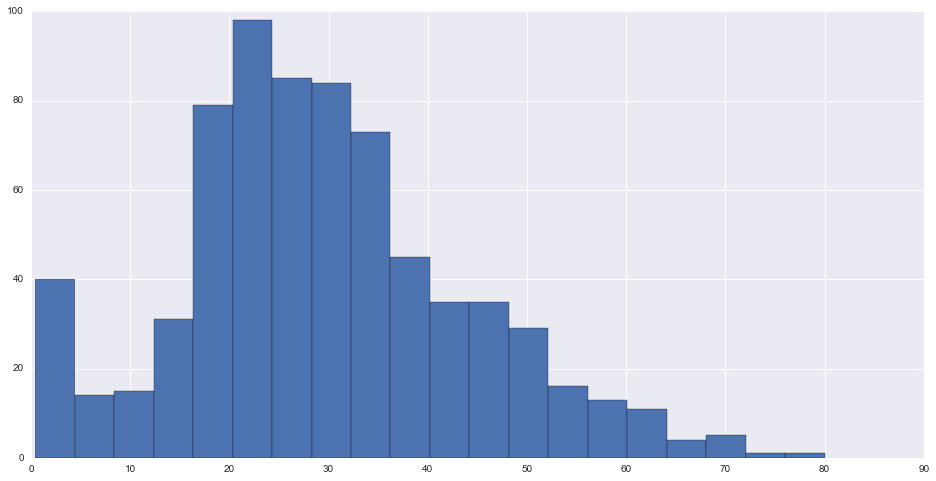

In [14]:
# age distribution
plt.figure(figsize=(16,8))
plt.hist(train['Age'],bins=20,range = (train['Age'].min(),train['Age'].max()))

most of the people seem to be young adults. We'll use the "age_filled" column for predictions, but rather using age for EDA. Lot of people seem to be in the early 20s. But we need to be cognisant of the fact that in those days, kids became adults earlier than 18-20.

**5. How did age contribute to survival? **

1. Firstly, we create age bins
2. Then plot a histogram of the age bins
3. Plot survival % against each age bin

In [15]:
# create 10 year age bins
# 1. round the ages to make it consistent
train['Age_rounded'] = np.round(train['Age'], -1)

# 2. create a dict for age bins
age_bins_dict =    {0  : 'Less than 5',
                    10 : 'Between 5 and 15',
                    20 : 'Between 15 and 25',
                    30 : 'Between 25 and 35',
                    40 : 'Between 35 and 45',
                    50 : 'Between 45 and 55',
                    60 : 'Between 55 and 65',
                    70 : 'Between 65 and 75',
                    80 : 'Between 75 and 85'}

# 3. categorise the ages into bins
train['age_bins'] = train['Age_rounded'].map(age_bins_dict)

# 4. drop columns age_bins and age_rounded because I found a more elegant way. 
#    I'm keeping this because it's a pretty decent hack for bins of size 10.
train = train.drop('Age_rounded',axis = 1)
train = train.drop('age_bins',axis = 1)

In [16]:
# create age bins of size 20
age_bins = np.linspace(train.Age.min(), train.Age.max(), 20)
print age_bins

# cut all numeric variables of the dataframe by age_bins and group them together.
survived_by_age_input = train.groupby(pd.cut(train['Age'],age_bins))

# use the groups to find summary stats
print "Survivors in this age group", survived_by_age_input.sum().Survived
print "Total passengers in age group", survived_by_age_input.count().Survived

[  0.42         4.60842105   8.79684211  12.98526316  17.17368421
  21.36210526  25.55052632  29.73894737  33.92736842  38.11578947
  42.30421053  46.49263158  50.68105263  54.86947368  59.05789474
  63.24631579  67.43473684  71.62315789  75.81157895  80.        ]
Survivors in this age group Age
(0.42, 4.608]        26
(4.608, 8.797]        9
(8.797, 12.985]       4
(12.985, 17.174]     21
(17.174, 21.362]     26
(21.362, 25.551]     37
(25.551, 29.739]     32
(29.739, 33.927]     34
(33.927, 38.116]     34
(38.116, 42.304]     19
(42.304, 46.493]      9
(46.493, 50.681]     16
(50.681, 54.869]      9
(54.869, 59.0579]     6
(59.0579, 63.246]     6
(63.246, 67.435]      0
(67.435, 71.623]      0
(71.623, 75.812]      0
(75.812, 80]          1
Name: Survived, dtype: int64
Total passengers in age group Age
(0.42, 4.608]        39
(4.608, 8.797]       14
(8.797, 12.985]      15
(12.985, 17.174]     44
(17.174, 21.362]     91
(21.362, 25.551]     97
(25.551, 29.739]     83
(29.739, 33.927]

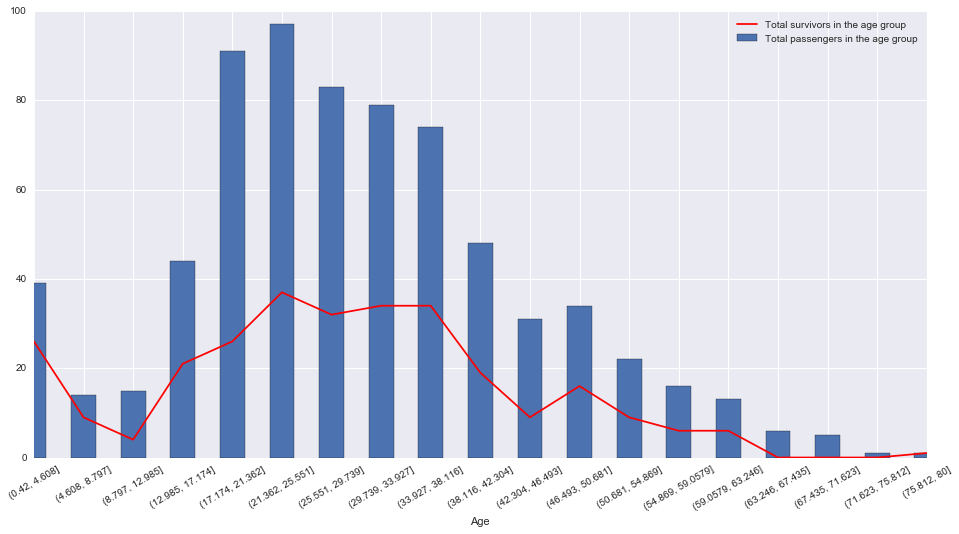

In [17]:
plt.figure(figsize=(16,8))
ax1 = survived_by_age_input.count().Survived.plot(kind='bar',label='Total passengers in the age group')
ax2 = survived_by_age_input.sum().Survived.plot(kind='line',sharex=True,color='r',label='Total survivors in the age group')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=30)
plt.legend(loc='upper right')

**OBSERVATION ** - late teens and early 20s being the major population of the titanic is consistent. But survival numbers are not consistent because they aren't normalised. I'll keep this figure because it is good learning. 

However, the subsequent normalised plot for counts and survival % is more relevant. Trick is to use twinx for same axes.

**Note:** 177 ages are missing, and we are using the unfilled ages for exploration. So we're analysing < 80% of the training set.

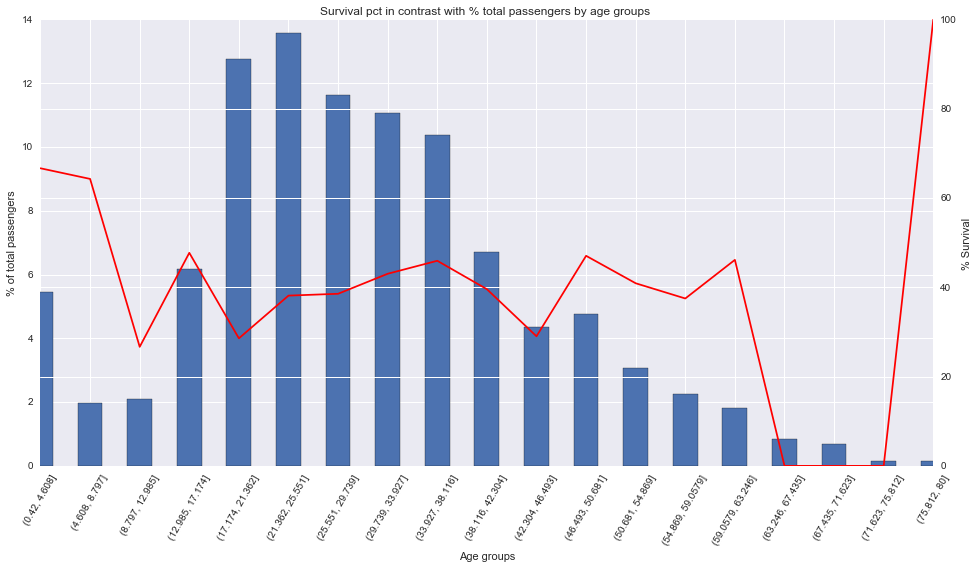

In [18]:
#print survived_by_age_input.Survived.apply(lambda x: x.sum().astype(float)/x.count().astype(float)*100)
#print

#print survived_by_age_input.Survived.apply(lambda x: x.count().astype(float)/714*100)

# plot this stuff
plt.figure(figsize=(16,8))
ax1 = survived_by_age_input.Survived.apply(lambda x: x.count().astype(float)/714*100).plot(kind = 'bar')
ax1.set_xlabel('Age groups')
ax1.set_ylabel('% of total passengers')

ax2 = ax1.twinx()
ax2 = survived_by_age_input.Survived.apply(lambda x: x.sum().astype(float)/x.count().astype(float)*100).plot(kind='line', 
                                                                                                             color='r')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=60)
ax2.set_ylabel("% Survival")
plt.title("Survival pct in contrast with % total passengers by age groups ")

**Observations** - Children up until 9 years of age seem to have a high survivability. However, 9 onwards the trend seems to be consistent with the rest of the age groups until 60 years. this makes me wonder whether it is really age that is causing the high suvivability of kids under 9 years of age, or some other confounder (ex - kids with parents vs kids without parents). so the hypothesis now is that children may have higher survivability, but not because of the women and children first hypothesis. But it could simply be that most of the young kids traveled with their parents and that their parents might have gone to various lengths to ensure the safety of their children.

Phew, now on to analysing some fares.

(array([ 562.,  170.,   67.,   39.,   15.,   16.,    2.,    0.,    9.,
           2.,    6.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    3.]),
 array([   0.     ,   25.61646,   51.23292,   76.84938,  102.46584,
         128.0823 ,  153.69876,  179.31522,  204.93168,  230.54814,
         256.1646 ,  281.78106,  307.39752,  333.01398,  358.63044,
         384.2469 ,  409.86336,  435.47982,  461.09628,  486.71274,
         512.3292 ]),
 <a list of 20 Patch objects>)

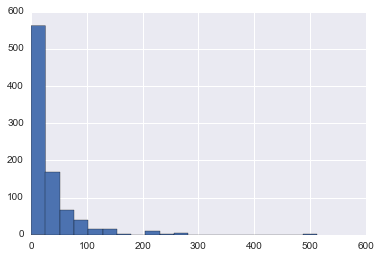

In [19]:
plt.hist(train['Fare'],bins=20)

seems like most of the fares are less than 100. but there are a few outliers that are pretty expensive. worth splitting the fares up by 100 and looking at the fare distribution.

(array([ 15.,   7.,   9.,   2.,   0.,   5.,   4.,   8.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([ 100.     ,  120.61646,  141.23292,  161.84938,  182.46584,
         203.0823 ,  223.69876,  244.31522,  264.93168,  285.54814,
         306.1646 ,  326.78106,  347.39752,  368.01398,  388.63044,
         409.2469 ,  429.86336,  450.47982,  471.09628,  491.71274,
         512.3292 ]),
 <a list of 20 Patch objects>)

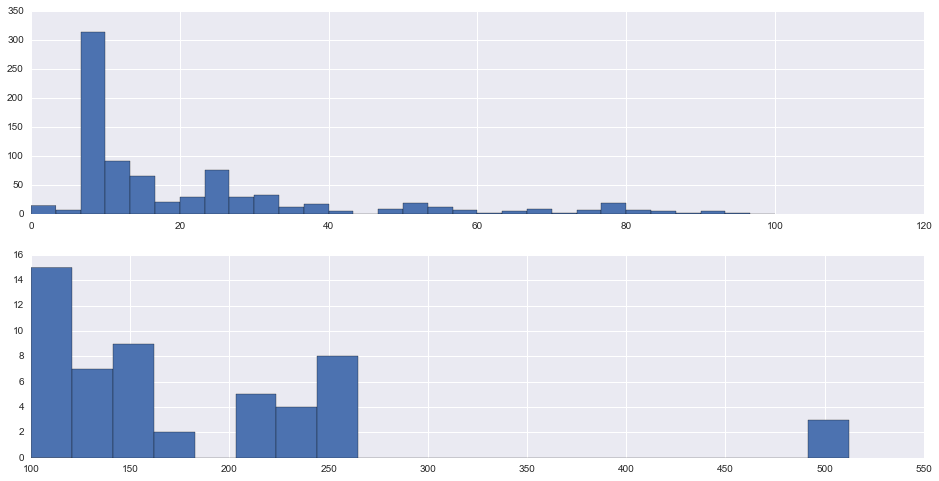

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.hist(train['Fare'],bins=30,range=(train['Fare'].min(),100))
plt.subplot(212)
plt.hist(train['Fare'],bins=20,range=(100,train['Fare'].max()))

so we can see one clear outlier at \$500 but otherwise, it seems like the first class passengers paid in the 100-250 range, while the few second class people are between the 20-40 range. most of the 300-400 odd passengers seem to have paid around \$10 and they are probably in third class. Let's test these out by introducing class as well.

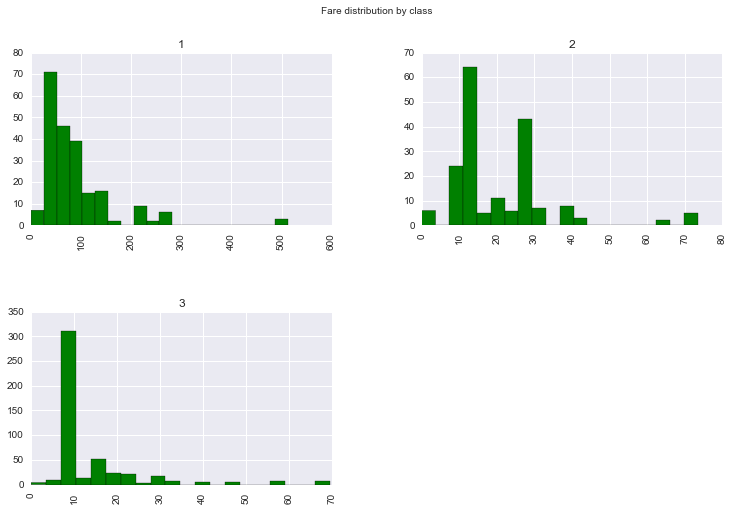

In [21]:
#plt.plot(x=train['Fare'],y=train['Pclass'])
#from pandas import DataFrame
plt.figure(figsize=(14,7))
df = pd.DataFrame({'Pclass':train['Pclass'], 'Fare':train['Fare']})
df['Fare'].hist(by=df['Pclass'],color='green',figsize=(12,8),bins=20)
plt.suptitle("Fare distribution by class")

Interesting visualisation from a learnings perspective. First, a look into the actual graphs. And second, into what I learned about python.
- 1) Insights were correct about fares being tightly linked to class. third class passengers are mainly \$10, while second class varies between 10-40. First class varies between 50-120, with each having a few outliers. Presence of \$0 tickets indicates free rides or data entry issues.
- 2) i used pandas for this because it has a really good "group by" feature. matplotlib allows you to input multiple data in its "x" variable as a n dimensional array, but the viz is pretty terrible. check how the pandas dataframe stacks up against the R dataframe.

Let's see another way of seeing this in one figure - as a boxplot

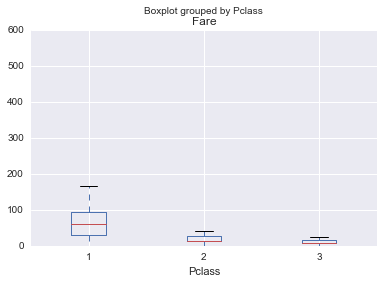

In [22]:
# creating boxplot
# Notes - 
# add patch_artist=True option to boxplot to get fill color

fig = df.boxplot(column='Fare',return_type='axes',by='Pclass')

## Predicting survival

#### 1. Using insights from EDA. 

I've learnt a few things from EDA. Let me use these to come up with my first prediction.

a) Sex - if passenger is female then alive, if male then dead.

b) Class - if first then alive, if third class then dead, if second then indifferent.

c) Embarked - if C then alive, if S then dead, if Q then indifferent.

d) Age - if passenger is less than 9 years of age, then alive, if > 60 then dead, if others then indifferent.

Use this as a weighted average measure. Ideally, I'd start with a weight and then tweak it to best fit the training dataset. 
But I will be doing it only once and then moving on to the more scientific regression approach. I came up with the weights based on my EDA and my reading of the plots above.

The weights I have decided are as follows - 

In [23]:
iteration_1_weightings = pd.DataFrame({'Weights': ['60%','20%','10%','10%'],
                                       '1': ['Female','First','C','Less than 9'],
                                       '0': ['Male','Second','Q','Any other age'],
                                       '-1':['','Third','S','Greater than 60'] },
                                      index = ['Sex','Class','Embarked','Age'])
iteration_1_weightings

,-1,0,1,Weights
Sex,,Male,Female,60%
Class,Third,Second,First,20%
Embarked,S,Q,C,10%
Age,Greater than 60,Any other age,Less than 9,10%


**Phew! Coming back to this after such a long time.**
Its 14th August 2016

In [24]:
# Hmmm. Seems like pretty warped logic to me. Sex seems to be the biggest decider. And the weights seem completely
# arbitrary. It seems much easier to simply run a classifier on it. That way, you wouldn't have to run a loop on it
# and adjust the weights as well as the -1,0,1 weightings! Well, I'm committed to seeing this shit through, so 
# let's get to it. I'll do a hackly job and finish this step.

# I've simply hard coded the constraints in this function. As a first step, the gating criteria is +0.5.
# i.e. if sex is 'female' then i could have scored a 0.6, but if I'm in 3rd class then i lose 0.2
# i have no idea why i've come up with so convoluted a logic.

# to further improve this, i can do a test train split and get the gating criteria that has highest prediction 
# accuracy, but i'm conscious that i don't want to over-engineer this step. 
# so, i just might not improve this at all haha!

def calculate_weighted_avg_survival(train_row):
    _ =  np.where(train_row.Sex == 'male',0,1)*0.6 + \
         np.where(train_row.Pclass == 3,-1,np.where(train_row.Pclass == 2,0,1)) * 0.20 + \
         np.where(train_row.Embarked == 'S',-1,np.where(train_row.Embarked == 'Q',0,1)) * 0.10 + \
         np.where(train_row.Age_filled > 60,-1,np.where(train_row.Age_filled < 9,1,0)) * 0.10
    return np.where(_ >= 0.5, 1, 0)

In [25]:
train['Survived_pred'] = train.apply(lambda x: calculate_weighted_avg_survival(x), axis = 1)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SiblingsOrSpouse,...,Fare,Cabin,Embarked,Age_filled,factored_Sex,factored_Embarked,Survived_pred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,...,7.2500,NaN,S,22.0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,...,71.2833,C85,C,38.0,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,...,7.9250,NaN,S,26.0,1,0,0


In [26]:
# looking at the survival numbers (both fact as well as predicted) for kix...

print train.Survived.value_counts()
print type(train.Survived.as_matrix().astype(np.int))
print "\n"
print train.Survived_pred.value_counts()
print type(train.Survived_pred.as_matrix().astype(np.int))

0    549
1    342
Name: Survived, dtype: int64
<type 'numpy.ndarray'>


0    698
1    193
Name: Survived_pred, dtype: int64
<type 'numpy.ndarray'>


In [27]:
# measure accuracy of predictions

# import
from sklearn import metrics

# run accuracy score
print "accuracy is: ",metrics.accuracy_score(train.Survived.as_matrix().astype(np.int), 
                             train.Survived_pred.as_matrix().astype(np.int))
print "\n"

# run confusion matrix
print "confusion matrix is printed below: "
print metrics.confusion_matrix(train.Survived.as_matrix().astype(np.int), 
                             train.Survived_pred.as_matrix().astype(np.int))
print "\n"

# run f1 score
print "f1 score is: ", metrics.f1_score(train.Survived.as_matrix().astype(np.int), 
                             train.Survived_pred.as_matrix().astype(np.int))

accuracy is:  0.794612794613


confusion matrix is printed below: 
[[532  17]
 [166 176]]


f1 score is:  0.657943925234


From the looks of the confusion matrix, I think i can fiddle around with the weights, the coefficients etc and everything else for quite some time. An obvious first step is to run a loop to maximise the F1 score.

But let's apply some science and actually let the machine get the right coefficient! Moving on towards more sophisticated methods of analysis.